In [1]:
!pipenv install pandas scipy numpy plotly  matplotlib

Installing pandas…
Adding pandas to Pipfile's [packages]…
✔ Installation Succeeded 
Installing scipy…
Adding scipy to Pipfile's [packages]…
✔ Installation Succeeded 
Installing numpy…
Adding numpy to Pipfile's [packages]…
✔ Installation Succeeded 
Installing plotly…
Adding plotly to Pipfile's [packages]…
✔ Installation Succeeded 
Installing matplotlib…
Adding matplotlib to Pipfile's [packages]…
✔ Installation Succeeded 
Installing dependencies from Pipfile.lock (e434a7)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 59/59 — 00:00:04mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm


In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib.dates as md
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
url = "http://data.gov.in/sites/default/files/dataurl14032019/RS_Session_246_AU459_1.3.csv"
df = pd.read_csv('./data/zone-wise-punctuality-sf.csv')

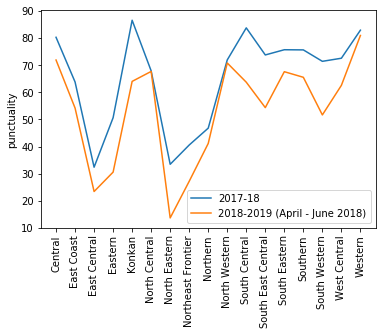

In [5]:
plt.plot(df['Zone'],list(zip(df['2017-18'],df['2018-2019 (April - June 2018)'])))
plt.xticks(rotation=90)
plt.ylabel('punctuality')
plt.legend(df.columns.to_list()[1:])
plt.show()
plt.close()

In [6]:
projection = ["Train No","Station Code","Arrival time","Departure Time"]
data = pd.read_csv("./data/Train_details_22122017.csv",low_memory=False)
data = data[data["Arrival time"].str.match(r'\d\d:\d\d:\d\d') == True][projection]
data["Departure Time"] = pd.to_datetime(data["Departure Time"], format='%H:%M:%S',errors="ignore")
data["Arrival time"] = pd.to_datetime(data["Arrival time"], format='%H:%M:%S',errors="ignore")

In [7]:
kcvl_sbc_stations = list(data[data["Train No"] == "16316"]["Station Code"])
schedule = data[data["Station Code"].isin(kcvl_sbc_stations)]
gb = schedule.groupby("Train No")
schedules = {x : gb.get_group(x)[['Station Code','Arrival time']].set_index('Arrival time') for x in gb.groups}
print(len(list(schedules.keys())[:10]))

10


In [8]:
keys = list(map(lambda x:str(x)[11:16],schedules['16316'].resample('1T').pad(None).index.values))
station_code = list(map(lambda x: kcvl_sbc_stations.index(x),schedules['16316'].resample('1T').pad(None).values))
samples = [keys,station_code]

72 5


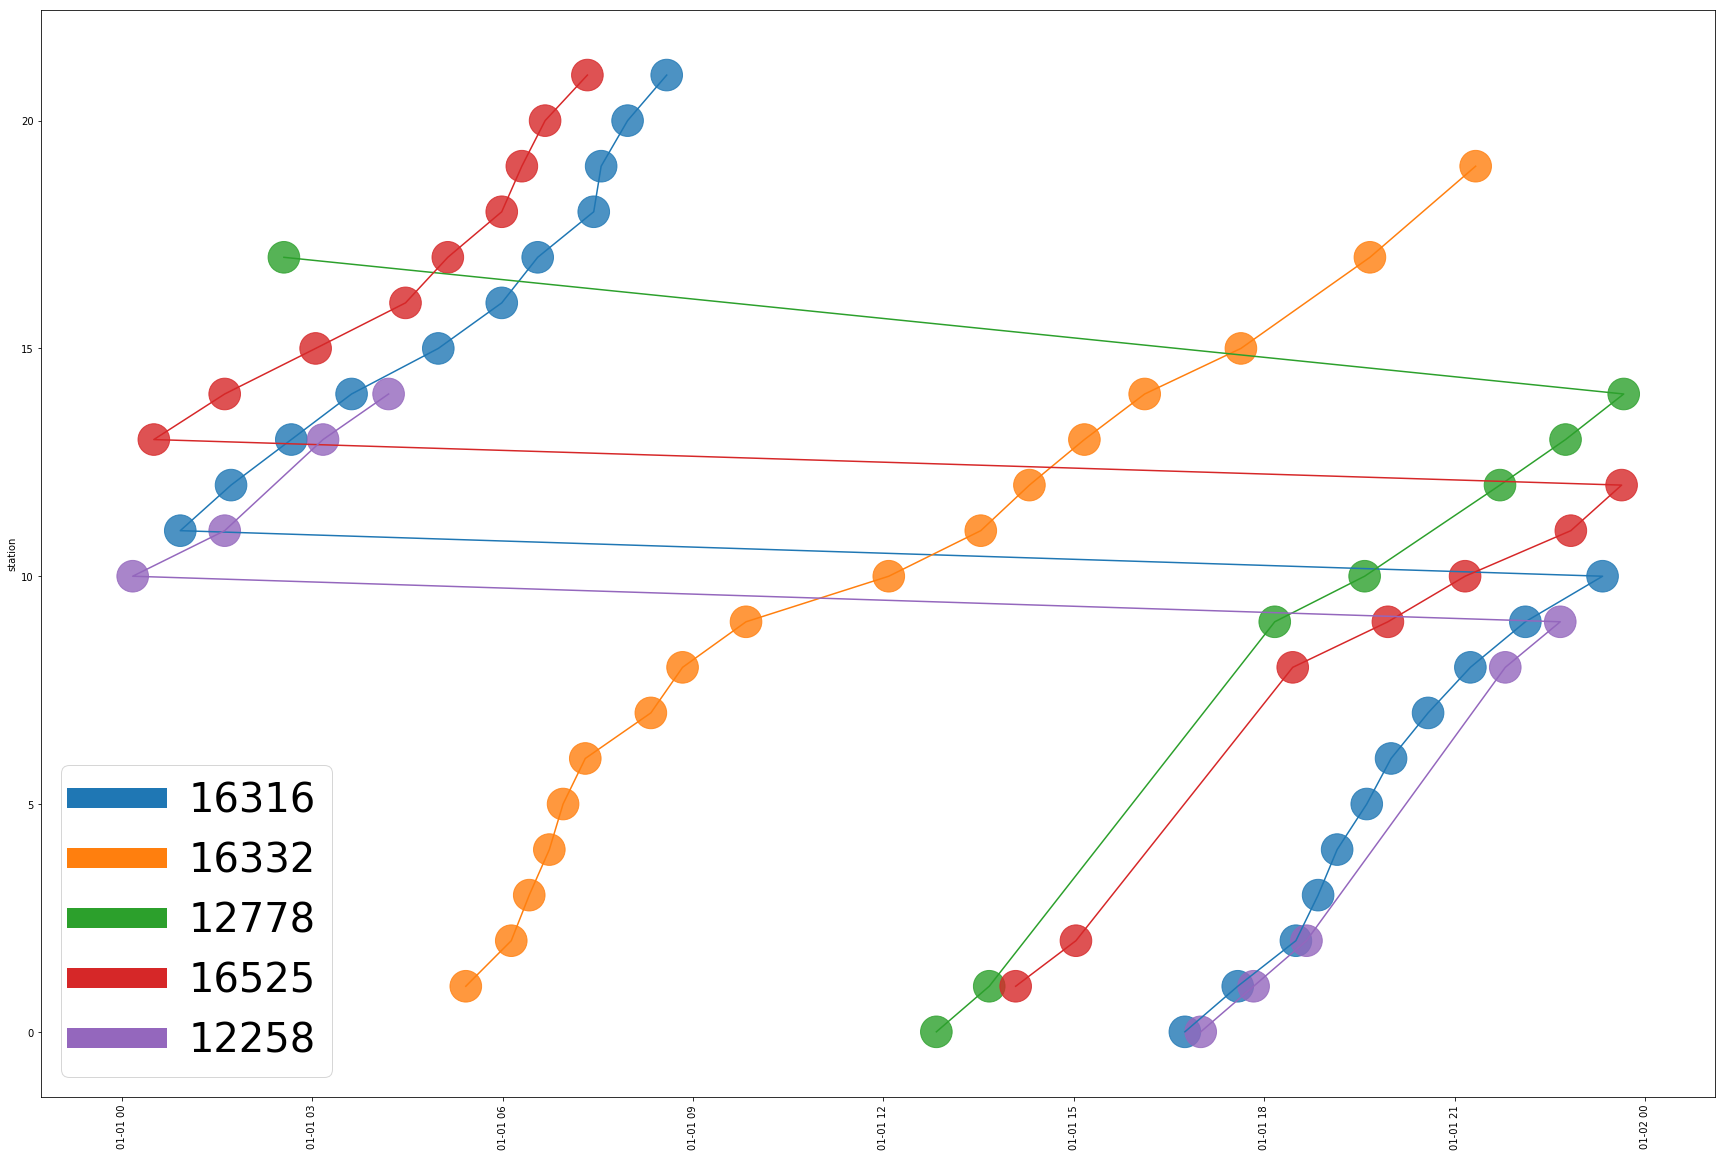

In [14]:
def pl(num):
    keys = schedules[num].index.values
    station_code = list(map(lambda x: kcvl_sbc_stations.index(x),schedules[num].values))
    samples = [keys,station_code]
    plt.plot(keys,station_code)
    plt.scatter(keys,station_code,s=[1000]*len(keys),alpha=0.8, cmap='viridis')
plt.close()
stations = list(schedules.keys())
plt.rcParams['figure.figsize'] = [30, 20]
fig, ax = plt.subplots()
fig.canvas.draw()
x = 0
stations=['16316','16332','12778','16525','12258']
for key in stations:
    x = x + len(schedules[key])
    pl(key)

plt.xticks(rotation=90)
plt.ylabel('station')
leg = plt.legend(stations,prop={'size': 40})
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=20)
fig.show()
print(x,len(stations))